In [1]:
import h5py
import numpy as np

# --- Bước 1: Khai báo đường dẫn đến file của bạn ---
file_name = r'D:\Python\data-ppg-ecg\cuff+less+blood+pressure+estimation\ALL_PARTS_COMBINED.h5'

# --- Bước 2: Xem cấu trúc của file ---
def print_structure(name, obj):
    """Hàm này duyệt và in cấu trúc của file H5."""
    indent = '    ' * name.count('/')
    if isinstance(obj, h5py.Dataset):
        print(f"{indent}📄 Dataset: {name.split('/')[-1]} (Shape: {obj.shape}, Dtype: {obj.dtype})")
    elif isinstance(obj, h5py.Group):
        print(f"{indent}📂 Group: {name.split('/')[-1] or '/'}")

try:
    with h5py.File(file_name, 'r') as f: # Mở file ở chế độ chỉ đọc 'r'
        print(f"📖 Cấu trúc của file '{file_name}':\n")
        f.visititems(print_structure)
        print("-" * 50)
        
        # --- Bước 3: Đọc và in dữ liệu từ một dataset cụ thể ---
        # THAY THẾ 'ten_dataset_ban_muon_xem' BẰNG TÊN DATASET THỰC TẾ
        # Dựa vào cấu trúc đã in ở trên để tìm đúng tên.
        # Ví dụ: nếu có dataset tên là 'part1', bạn sẽ thay bằng 'part1'.
        
        dataset_name_to_read = 'data' 
        
        if dataset_name_to_read in f:
            # Lấy đối tượng dataset
            data = f[dataset_name_to_read]
            
            # Đọc nội dung vào biến (sử dụng [()] để tải toàn bộ)
            content = data[()]
            
            print(f"\n📄 Nội dung của dataset '{dataset_name_to_read}':")
            print(content)
            
            # Nếu dữ liệu quá lớn, bạn có thể chỉ in một vài dòng đầu
            # print(f"\n📄 5 dòng đầu tiên của dataset '{dataset_name_to_read}':")
            # print(content[:5])
            
        else:
            print(f"\n❗️ Vui lòng thay thế 'ten_dataset_ban_muon_xem' bằng một tên dataset hợp lệ có trong file.")
            print(f"   Các đối tượng ở cấp cao nhất là: {list(f.keys())}")


except FileNotFoundError:
    print(f"❗️ Lỗi: Không tìm thấy file tại đường dẫn '{file_name}'.")
    print("   Vui lòng kiểm tra lại đường dẫn và đảm bảo file nằm đúng vị trí.")
except Exception as e:
    print(f"❗️ Đã xảy ra lỗi không mong muốn: {e}")

📖 Cấu trúc của file 'D:\Python\data-ppg-ecg\cuff+less+blood+pressure+estimation\ALL_PARTS_COMBINED.h5':

📄 Dataset: data (Shape: (71000, 3), Dtype: float64)
--------------------------------------------------

📄 Nội dung của dataset 'data':
[[  0.70381232  62.19039256   0.35518591]
 [  0.72140762  61.99482529   0.44520548]
 [  0.73313783  61.79925802   0.54500978]
 ...
 [  1.65004888  78.34594325   0.26990718]
 [  1.60801564  88.16360821   0.23986321]
 [  1.57380254 100.17925786   0.22984856]]


📂 Cấu trúc file HDF5:

📄 Dataset: ecg_segments -> shape=(247, 1000), dtype=float64
📄 Dataset: labels -> shape=(247, 3), dtype=float64
📄 Dataset: ppg_segments -> shape=(247, 1000), dtype=float64

✅ Đã tải mẫu dữ liệu đầu tiên để vẽ biểu đồ.


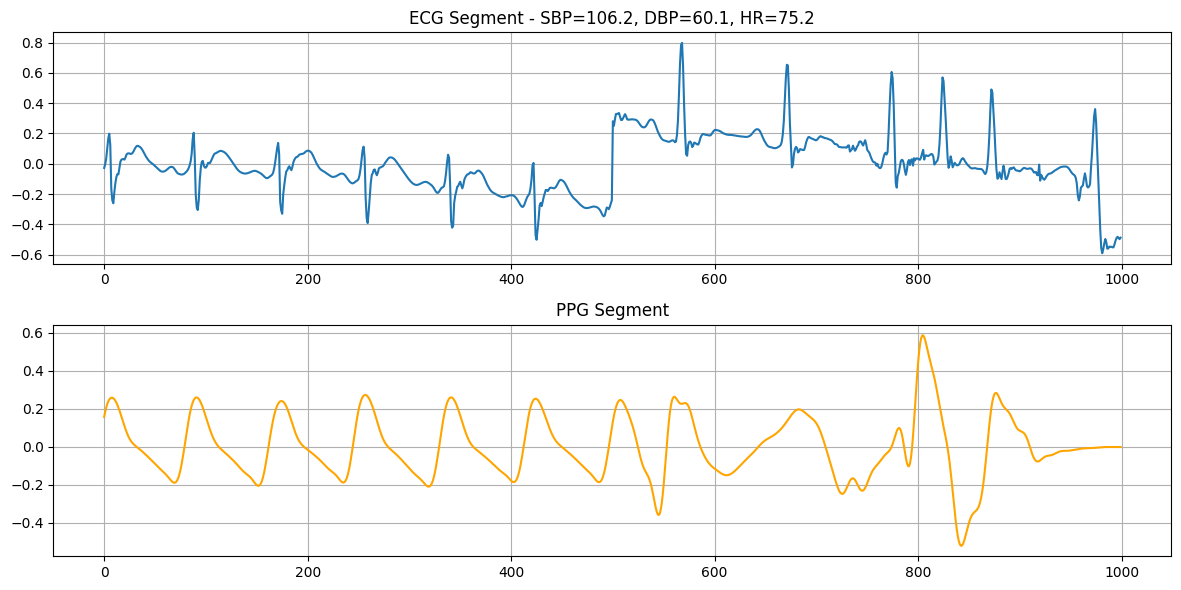

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

file_path = r"D:\Python\data-ppg-ecg\cuff+less+blood+pressure+estimation\filtered_segments.h5"

with h5py.File(file_path, 'r') as f:
    print("📂 Cấu trúc file HDF5:\n")

    # Hàm duyệt toàn bộ cấu trúc file (giữ nguyên để kiểm tra)
    def print_structure(name):
        obj = f[name]
        if isinstance(obj, h5py.Dataset):
            print(f"📄 Dataset: {name} -> shape={obj.shape}, dtype={obj.dtype}")
        elif isinstance(obj, h5py.Group):
            print(f"📁 Group: {name}")

    f.visit(print_structure)

    # --- BƯỚC QUAN TRỌNG ĐƯỢC THÊM VÀO ---
    # Bạn cần thay thế 'ten_dataset_...' bằng tên thật từ kết quả in ở trên.
    # Giả sử tên là 'X_ecg', 'X_ppg', 'Y_labels'.
    # Chúng ta sẽ lấy mẫu dữ liệu đầu tiên (ở chỉ số [0]) để vẽ.
    ecg = f['ecg_segments'][0]
    ppg = f['ppg_segments'][0]
    label = f['labels'][0]
    # ----------------------------------------

    print("\n✅ Đã tải mẫu dữ liệu đầu tiên để vẽ biểu đồ.")

    # Bây giờ, phần code vẽ sẽ chạy được
    plt.figure(figsize=(12, 6))

    plt.subplot(2,1,1)
    plt.plot(ecg)
    # Tiêu đề hiển thị cả các giá trị huyết áp và nhịp tim
    plt.title(f"ECG Segment - SBP={label[0]:.1f}, DBP={label[1]:.1f}, HR={label[2]:.1f}")
    plt.grid(True)

    plt.subplot(2,1,2)
    plt.plot(ppg, color='orange')
    plt.title("PPG Segment")
    plt.grid(True)

    plt.tight_layout() # Tự động điều chỉnh khoảng cách
    plt.show()